# Microsoft Movie Analysis
### Author:  A KARAOGLAN

### Overview

This project represents a preliminary study of the entry into the microsoft film industry. The company, which is very new in this sector, made front studies by making use of the large database containing the data of movies such as IMDB, TMDB, ROTTEN TOMATOES. We decided to examine the director, genre and movie profit. We determined which film genres had a more successful effect on the directors' profit. Using this data, Microsoft can decide which movies it would be right to start with in its new project.


### Business Problem

Microsoft is the world leader in its field, but the film industry is also very new in terms of know-how, the company should decide how much budget it has outside of this project and decide on the film it will shoot. The results of the data and analyzes I have collected show the following. Genre and profit data of the directors have determined the genre that provides the least risk for companies that have just started in the film industry.

### Data Understanding

Questions to consider:

###### Question  Where did the data come from, and how do they relate to the data analysis questions?
The data is provided by Flatiron school and collected from the respective websites.

The data is collected from Box Office Mojo, IMDB, Rotten Tomatoes, and TheMovieDB.org. The data has information about movie titles, genres, directors, actors, profits, release year.

What is the target variable?
Target variables are the Genre, Directors and Runtime.


In [724]:
#Import the following libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import matplotlib.pyplot as plt
%matplotlib inline


In [725]:
# Here you run your code to explore the data

bom_movie_gross = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/bom.movie_gross.csv.gz')
imdb_name_basics = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/imdb.name.basics.csv.gz')
imdb_title_akas = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/imdb.title.akas.csv.gz')
imdb_title_basics = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/imdb.title.basics.csv.gz')
imdb_title_principals = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/imdb.title.principals.csv.gz')
imdb_title_ratings = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/imdb.title.ratings.csv.gz')
tmdb_movies = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/tmdb.movies.csv.gz')
tn_movie_budgets = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/tn.movie_budgets.csv.gz')
imdb_title_crew = pd.read_csv('/Users/karaoglan/Desktop/PROJECT/imdb.title.crew.csv.gz')


In [726]:
imdb_title_crew

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943
...,...,...,...
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825


In [727]:
imdb_name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
...,...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN


In [728]:
bom_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [729]:
imdb_title_ratings

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [730]:
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [731]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


### Data preparation 
##### Here are the datasets that I used for analysis:

imdb datasets: imdb_name_basics,imdb_title_akas,imdb_title_basics,imdb_title_principals,imdb_title_ratings,imdb_title_crew

tmdb dataset: tmdb_movies

bom dataset: bom_movie_gross

tn dataset: tn_movie_budgets

In [732]:
# I merged imdb related datasets on the value 'tconst'

imdb11 = pd.merge(imdb_title_basics,imdb_title_crew,how='inner',on='tconst')
imdb12 = pd.merge(imdb_title_principals,imdb_title_ratings, how='inner',on='tconst')
imdb13 = pd.merge(imdb11,imdb12,how='inner',on='tconst')


# I merged imdb name basics and imdb13 with nconst

IMDB = pd.merge(imdb_name_basics,imdb13,how='inner',on='nconst')

# IMDB and tmbd therefore do not have common value
# I merged it using the 'original_title'
itmb = pd.merge(tmdb_movies,IMDB, how='inner',on='original_title')
itmb.head(3)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,runtime_minutes,genres,directors,writers,ordering,category,job,characters,averagerating,numvotes
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,146.0,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",6,writer,screenplay,NaN,7.7,425530
1,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,146.0,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",3,actor,NaN,"[""Ron Weasley""]",7.7,425530
2,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,...,146.0,"Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",7,writer,"novel ""Harry Potter and the Deathly Hallows",NaN,7.7,425530


In [733]:
itmb.drop(['original_title','primary_title','Unnamed: 0','genre_ids','id','original_language','release_date','known_for_titles','nconst','tconst','start_year','birth_year','death_year','vote_count','runtime_minutes','category','job','characters','ordering'], axis=1,inplace=True)
itmb.head(3)

,popularity,title,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes
0,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,Steve Kloves,"writer,producer,director","Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",7.7,425530
1,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,Rupert Grint,"actor,producer,soundtrack","Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",7.7,425530
2,33.533,Harry Potter and the Deathly Hallows: Part 1,7.7,J.K. Rowling,"writer,producer,soundtrack","Adventure,Fantasy,Mystery",nm0946734,"nm0460141,nm0746830",7.7,425530


In [734]:
#i merged it using 'title' bom_movie_gross and itmb

itmbom = pd.merge(bom_movie_gross,itmb, how='inner',on='title')
itmbom.head(3)

,title,studio,domestic_gross,foreign_gross,year,popularity,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Joan Cusack,"actress,soundtrack,writer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218
1,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,John Lasseter,"producer,writer,director","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218
2,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Tom Hanks,"producer,actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218


In [735]:
#i did left join because I wanted to return data in both tables
itmbomtn = pd.merge(itmbom, tn_movie_budgets, how='inner',left_on='title', right_on='movie')
itmbomtn.head(3)

,title,studio,domestic_gross_x,foreign_gross,year,popularity,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Joan Cusack,"actress,soundtrack,writer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,John Lasseter,"producer,writer,director","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
2,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Tom Hanks,"producer,actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"


In [736]:
# domestic_gross is an object (str), needs to be converted to integer and get rid of '$' sign and comma

itmbomtn['worldwide_gross'] = itmbomtn['worldwide_gross'].str.replace(',','').str.replace('$','').astype(int)
itmbomtn['worldwide_gross'].head()

0    1068879522
1    1068879522
2    1068879522
3    1068879522
4    1068879522
Name: worldwide_gross, dtype: int64

In [737]:
# production_budget is an object (str), needs to be converted to integer and get rid of '$' sign and comma

itmbomtn['production_budget'] = itmbomtn['production_budget'].str.replace(',','').str.replace('$','').astype(int)
itmbomtn['production_budget'].head()

0    200000000
1    200000000
2    200000000
3    200000000
4    200000000
Name: production_budget, dtype: int64

#### Questions to consider
-what variables did you add ?


I created the profit value with worldwide_gross,production_budget

-which variables did you change ?
i changed the primary_name to Director

In [738]:
#i create profit,I subtracted product expenses from world income


itmbomtn = itmbomtn.dropna(subset=['worldwide_gross','production_budget'])
itmbomtn['profit']=itmbomtn['worldwide_gross']-itmbomtn['production_budget']
itmbomtn.drop(['studio','year','domestic_gross_x','domestic_gross_y','worldwide_gross','foreign_gross','production_budget'], axis=1,inplace=True)
itmbomtn.head(3)

,title,popularity,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes,id,release_date,movie,profit
0,Toy Story 3,24.445,7.7,Joan Cusack,"actress,soundtrack,writer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522
1,Toy Story 3,24.445,7.7,John Lasseter,"producer,writer,director","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522
2,Toy Story 3,24.445,7.7,Tom Hanks,"producer,actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522


In [739]:
itmbomtn.shape

(16184, 14)

In [740]:
itmbom = pd.merge(bom_movie_gross,itmb, how='inner',on='title')
itmbom.head(3)

,title,studio,domestic_gross,foreign_gross,year,popularity,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Joan Cusack,"actress,soundtrack,writer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218
1,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,John Lasseter,"producer,writer,director","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218
2,Toy Story 3,BV,415000000.0,652000000,2010,24.445,7.7,Tom Hanks,"producer,actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218


In [741]:
itmbomtn.head()

,title,popularity,vote_average,primary_name,primary_profession,genres,directors,writers,averagerating,numvotes,id,release_date,movie,profit
0,Toy Story 3,24.445,7.7,Joan Cusack,"actress,soundtrack,writer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522
1,Toy Story 3,24.445,7.7,John Lasseter,"producer,writer,director","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522
2,Toy Story 3,24.445,7.7,Tom Hanks,"producer,actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522
3,Toy Story 3,24.445,7.7,Andrew Stanton,"writer,actor,producer","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522
4,Toy Story 3,24.445,7.7,Ned Beatty,"actor,soundtrack","Adventure,Animation,Comedy",nm0881279,"nm0005124,nm0004056,nm0881279,nm1578335",8.3,682218,47,"Jun 18, 2010",Toy Story 3,868879522


In [742]:
itmbomtn.shape


(16184, 14)

### Data Modeling
How did you analyze or model the data?
I wanted to determine the profitability ratios of different film types.

I also wanted to determine the average ratings of different movie tours.

I wanted to determine both imdb and tmdb ratings.

I wanted to identify which directors Microsoft should work with for the best profit.

What did you do to get more accurate results?

To calculate profit, I took the production budget from world Groos and determined the best genre directors with these results.

why did you use these methods?

profit and film ratings are good result data to solve our business problem.

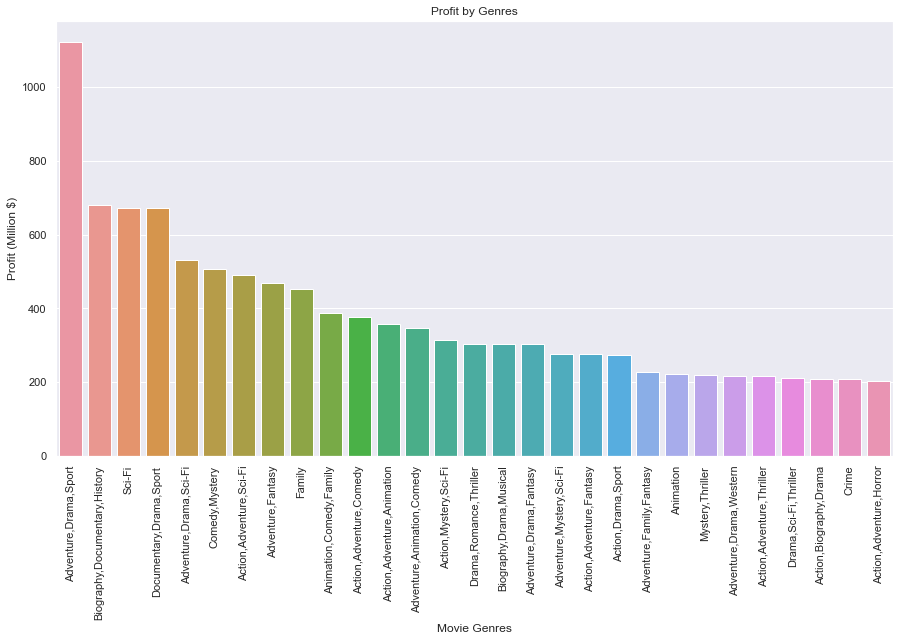

In [747]:
df1 = itmbomtn.groupby('genres').mean().sort_values(['profit'],ascending=False)
tg = df1[df1['profit']>0.2*(10**9)]
tg1 = tg.reset_index()
tg1 ['profit'] = tg1['profit']/(10**6)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='profit',data=tg1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Movie Genres", ylabel = "Profit (Million $)", title = 'Profit by Genres')
None #don't show the label objects
plt.savefig('df1.png',bbox_inches='tight')

In [709]:
tg1.genres.head(10)


0            Adventure,Drama,Sport
1    Biography,Documentary,History
2                           Sci-Fi
3          Documentary,Drama,Sport
4           Adventure,Drama,Sci-Fi
5                   Comedy,Mystery
6          Action,Adventure,Sci-Fi
7                Adventure,Fantasy
8                           Family
9          Animation,Comedy,Family
Name: genres, dtype: object

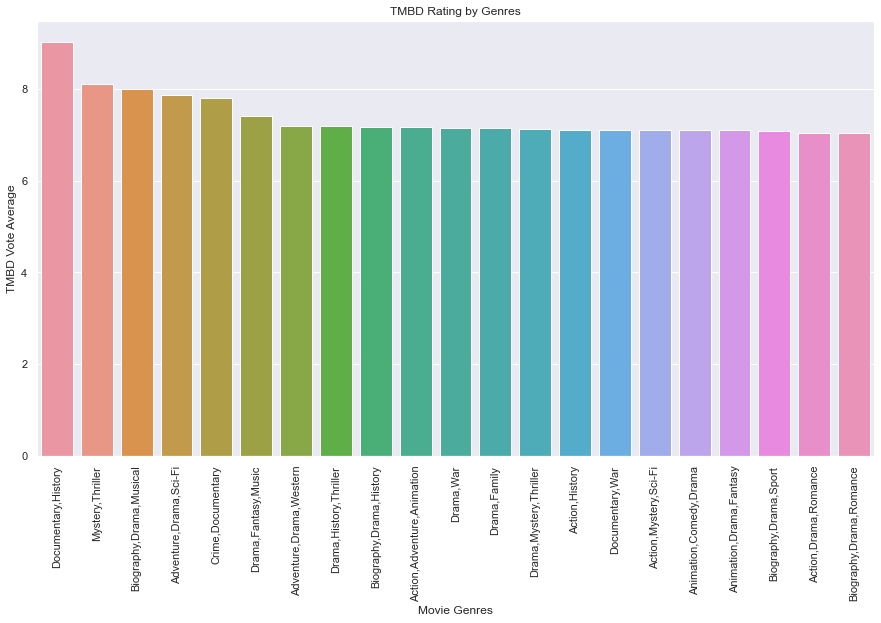

In [749]:
df2 = itmbomtn.groupby('genres').mean().sort_values(['vote_average'],ascending=False)
va = df2[df2['vote_average']>7]
va1 = va.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='vote_average',data=va1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Movie Genres", ylabel = "TMBD Vote Average", title = 'TMBD Rating by Genres')
None #don't show the label objects
plt.savefig('df2.png',bbox_inches='tight')

In [711]:
va1.genres.head(10)



0           Documentary,History
1              Mystery,Thriller
2       Biography,Drama,Musical
3        Adventure,Drama,Sci-Fi
4             Crime,Documentary
5           Drama,Fantasy,Music
6       Adventure,Drama,Western
7        Drama,History,Thriller
8       Biography,Drama,History
9    Action,Adventure,Animation
Name: genres, dtype: object

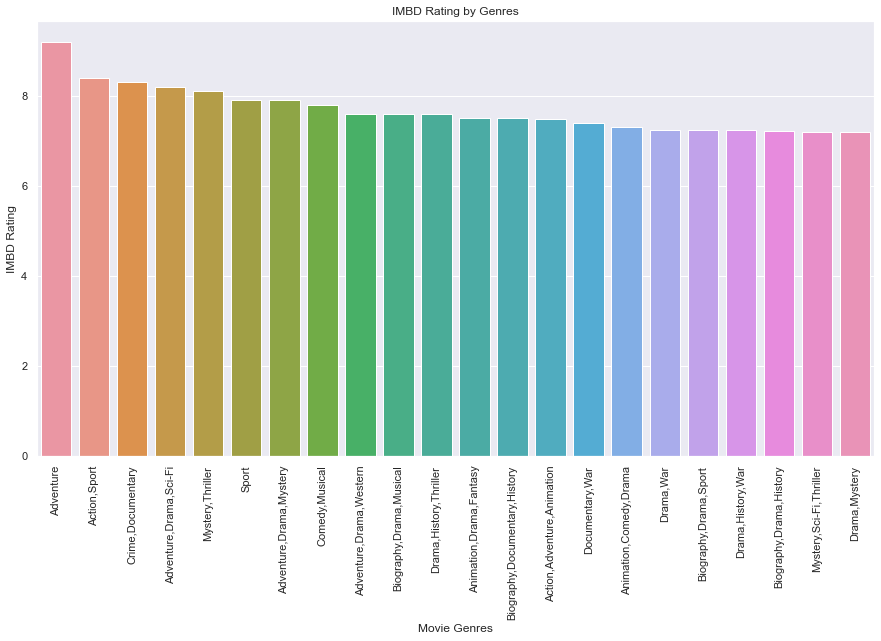

In [748]:
df3 = itmbomtn.groupby('genres').mean().sort_values(['averagerating'],ascending=False)
ar = df3[df3['averagerating']>7.2]
ar1 = ar.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='genres',y='averagerating',data=ar1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Movie Genres", ylabel = "IMBD Rating", title = 'IMBD Rating by Genres')
None #don't show the label objects
plt.savefig('df3.png',bbox_inches='tight')

In [713]:
ar1.genres.head(10)


0                  Adventure
1               Action,Sport
2          Crime,Documentary
3     Adventure,Drama,Sci-Fi
4           Mystery,Thriller
5                      Sport
6    Adventure,Drama,Mystery
7             Comedy,Musical
8    Adventure,Drama,Western
9    Biography,Drama,Musical
Name: genres, dtype: object

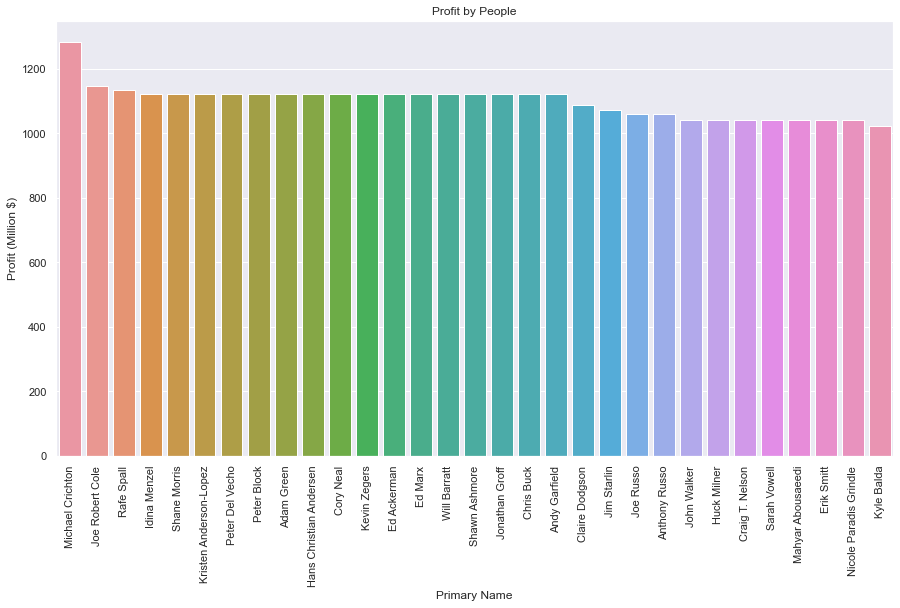

In [750]:
df4 = itmbomtn.groupby('primary_name').mean().sort_values(['profit'],ascending=False)
tg2 = df4[df4['profit']>1*(10**9)]
tg2 = tg2.reset_index()
tg2 ['profit'] = tg2['profit']/(10**6)
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='profit',data=tg2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Primary Name", ylabel = "Profit (Million $)", title = 'Profit by People')
None #don't show the label objects
plt.savefig('df4.png',bbox_inches='tight')

In [715]:
tg2.primary_name.head(10)


0           Michael Crichton
1            Joe Robert Cole
2                 Rafe Spall
3               Idina Menzel
4               Shane Morris
5     Kristen Anderson-Lopez
6            Peter Del Vecho
7                Peter Block
8                 Adam Green
9    Hans Christian Andersen
Name: primary_name, dtype: object

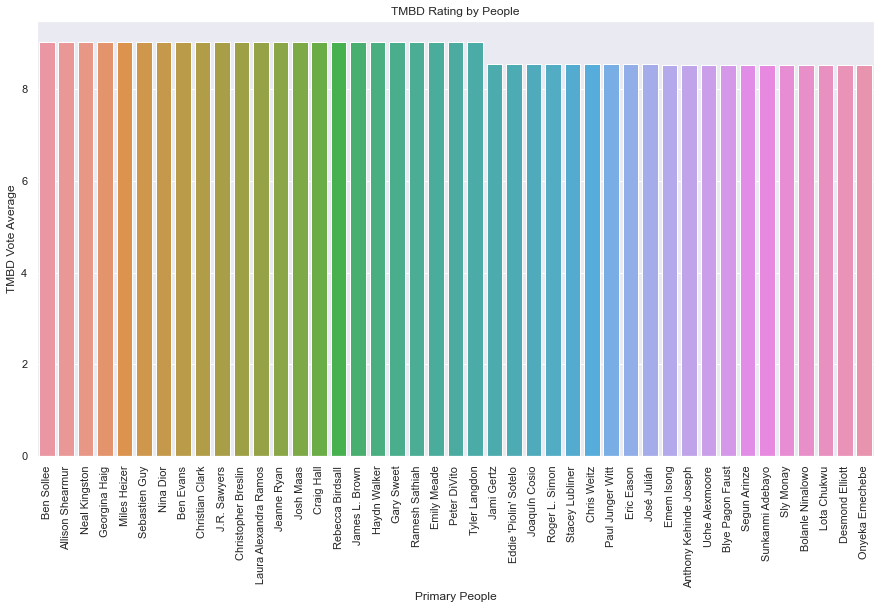

In [755]:
df5 = itmbomtn.groupby('primary_name').mean().sort_values(['vote_average'],ascending=False)
va2 = df5[df5['vote_average']>8.5]
va2 = va2.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='vote_average',data=va2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Primary People", ylabel = "TMBD Vote Average", title = 'TMBD Rating by People')
None #don't show the label objects
plt.savefig('df5.png',bbox_inches='tight')


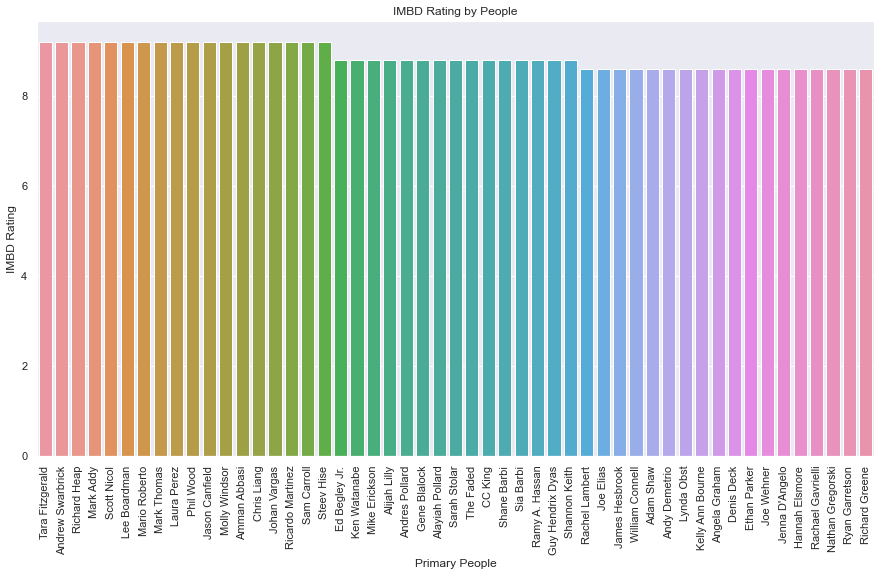

In [751]:
df6 = itmbomtn.groupby('primary_name').mean().sort_values(['averagerating'],ascending=False)
ar2 = df6[df6['averagerating']>8.5]
ar2 = ar2.reset_index()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.barplot(x='primary_name',y='averagerating',data=ar2)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(xlabel = "Primary People", ylabel = "IMBD Rating", title = 'IMBD Rating by People')
None #don't show the label objects
plt.savefig('df6.png',bbox_inches='tight')

In [721]:
ar2.primary_name.head(10)


0     Tara Fitzgerald
1    Andrew Swarbrick
2        Richard Heap
3           Mark Addy
4         Scott Nicol
5        Lee Boardman
6       Mario Roberto
7         Mark Thomas
8         Laura Perez
9           Phil Wood
Name: primary_name, dtype: object

# Evaluation
Questions to consider:

Question: How do you interpret the results?

in terms of genres and directors
We have a general knowledge using profit and rating results

Question: How confident are you that your results would generalize beyond the data you have?

imdb and tmdb is a channel that gives direction to the film industry

Question: 
How confident are you that this model would benefit the business if put into use?

I think this analysis will be helpful in choosing genres and people to work with.

### Conclusions
Questions to consider:

Question: What would you recommend the business do as a result of this work?

  In terms of best imdb movie genres for the highest profit, here are the top 10 genres that I would recommend:

    1            Adventure,Drama,Sport
    2    Biography,Documentary,History
    3                           Sci-Fi
    4          Documentary,Drama,Sport
    5           Adventure,Drama,Sci-Fi
    6                   Comedy,Mystery
    7          Action,Adventure,Sci-Fi
    8                Adventure,Fantasy
    9                           Family
    10          Animation,Comedy,Family
    
    Writers, directors and actors in the most profitable genre should be     worked with, the top 10 people with the highest profit

    1           Michael Crichton
    2            Joe Robert Cole
    3                 Rafe Spall
    4               Idina Menzel
    5               Shane Morris
    6     Kristen Anderson-Lopez
    7            Peter Del Vecho
    8                Peter Block
    9                 Adam Green
    10    Hans Christian Andersen
    
    
    IMDB and TMBD had different results on the best genres.
    
    Top 10 genres vote average TMDB
    
    1           Documentary,History
    2              Mystery,Thriller
    3       Biography,Drama,Musical
    4        Adventure,Drama,Sci-Fi
    5             Crime,Documentary
    6           Drama,Fantasy,Music
    7       Adventure,Drama,Western
    8     Drama,History,Thriller
    9       Biography,Drama,History
    10    Action,Adventure,Animation
    
    
    Top 10 genres vote average IMDB
    
    
    1                  Adventure
    2               Action,Sport
    3          Crime,Documentary
    4     Adventure,Drama,Sci-Fi
    5           Mystery,Thriller
    6                      Sport
    7    Adventure,Drama,Mystery
    8             Comedy,Musical
    9    Adventure,Drama,Western
    10    Biography,Drama,Musical
    
    
    
    IMDB and TMBD had different results on the best people to work with.
    
    
    
    Top 10 people by average votes on TMDB:
    1        Ben Sollee
    2    Allison Shearmur
    3       Neal Kingston
    4       Georgina Haig
    5        Miles Heizer
    6       Sebastien Guy
    7           Nina Dior
    8           Ben Evans
    9     Christian Clark
    10        J.R. Sawyers
    
    
    
    Top 10 people by averagevotes on IMDB:
    1     Tara Fitzgerald
    2    Andrew Swarbrick
    3        Richard Heap
    4           Mark Addy
    5         Scott Nicol
    6        Lee Boardman
    7       Mario Roberto
    8         Mark Thomas
    9         Laura Perez
    10           Phil Wood
    
   
Question:    What are some reasons why your analysis does not fully address the business problem?


More data can be collected, they should address global economic problems over the years, natural disasters, infectious diseases, the interest of countries in cinema should also be investigated.
    
Question: What else could you do in the future to improve this project?
    
The correlation between the minimum wage and the movie ticket prices of each country should be checked, at the same time, it should be determined that the advertising budgets and how many theaters were released.